In [1]:
# !pip install pyod

In [1]:
%reload_ext autoreload
%autoreload 2

import sys, os, time
import numpy as np
import pandas as pd
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
from pyod.models.loda import LODA
from pyod.models.vae import VAE
from pyod.models.hbos import HBOS
from pyod.models.lscp import LSCP
from pyod.models.sod import SOD
from pyod.models.ocsvm import OCSVM
from pyod.models.auto_encoder import AutoEncoder
from sklearn.mixture import BayesianGaussianMixture

import warnings

def ignore_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)
    warnings.simplefilter(action='ignore', category=DeprecationWarning)
ignore_warnings()

2023-07-03 11:56:39.432381: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-03 11:56:39.432421: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
def create_ds(N = 200, seed = 331):
    np.random.seed(seed)
    contamination = 0.1
    num_anom = int(N*contamination)
    a1_ = np.random.uniform(-5,5, size = (2,num_anom))
    d1_ = np.random.randn(2, np.int(N-num_anom))*.7
    y = np.zeros(N, dtype=np.int)
    y[:num_anom] = 1
    X = np.concatenate((a1_, d1_), axis=1).T
    return X, y

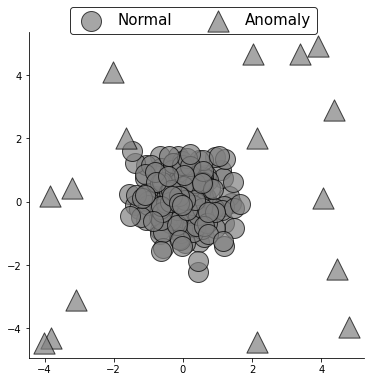

In [3]:
X, y = create_ds(N = 200)
n = len(y)
fig = plt.figure(figsize=(6,6), facecolor='w', edgecolor='k')
norms = np.array([x[0]**2+x[1]**2 for x in X])
class0pred = X[np.where(norms <= 6)[0]]
class1pred= X[np.where(norms > 6)[0]]
contamination = len(class1pred)/np.shape(X)[0]

cl0 = plt.scatter(class0pred.T[0],class0pred.T[1], 400, c = 'gray', alpha = 0.7, edgecolor = 'black',
                  label = 'Class 0')
cl1 = plt.scatter(class1pred.T[0],class1pred.T[1], 450, c = 'gray', marker = '^',edgecolor = 'black',
                  alpha = 0.7, label = 'Class 1')
plt.legend((cl0, cl1),
           ('Normal', 'Anomaly'),
           scatterpoints=1,
           loc='upper left',
           bbox_to_anchor=(0.1, 1.1),
           ncol=2,
           fontsize=15,frameon=True).get_frame().set_edgecolor('black')
sns.despine(right = True)

plt.show()

In [9]:
from gammaGMM import *

gamma_sample = run_gammaGMM(X, ad_list=[KNN(), IForest(), LOF(), OCSVM(), HBOS()], tot_samples=10000,
                            ndraws=100, p0=0.01, phigh=0.01, high_gamma=0.15, gamma_lim = 0.25, K=100, 
                            seed=331, cpu = 5)

Initialization 0
  Iteration 20
  Iteration 40
  Iteration 60
  Iteration 80
  Iteration 100
Initialization converged: True
(11,) 11 5 (11, 5, 5)


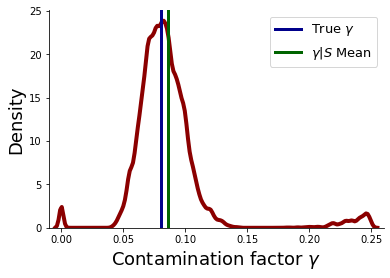

In [5]:
plt.figure()
sns.distplot(gamma_sample,bins=100,hist=False,color='darkred', kde_kws={'bw':.05,"color":'darkred',"lw":4})
plt.axvline(contamination,0,1, color = 'darkblue', label = r'True $\gamma$', lw = 3)
plt.axvline(np.mean(gamma_sample),0,1, color = 'darkgreen', label = '$\gamma|S$ Mean', lw = 3)
plt.xlim([-0.01, 0.26])
plt.xlabel(r'Contamination factor $\gamma$', fontsize = 18)
plt.ylabel('Density', fontsize = 18)
sns.despine()
plt.legend(fontsize = 13)
plt.show()